<img src="imgs/mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S8: Contaminación en Madrid

## Objetivos:

* Experimentar con datos de Open Data Madrid.
* Trabajar con datos de localización.
* Representar la contaminación en Madrid del mes de septiembre de 2018.

**NOTA:** Actualmente Google Chrome tiene un problema al renderizar gráficos complejos con folium. Por eso **se recomienda encarecidamente** el realizar esta sesión con __[Mozilla Firefox](https://www.mozilla.org/es-ES/firefox/new/)__. Si nuestro navegador por defecto no es Firefox, podremos acceder al servidor de Jupyter Notebook una vez lo hayamos lanzado, copiando la url que contiene el token en el navegador Firefox.

<img src="imgs/notebookrun.png"/>

## Inicializamos entorno

In [1]:
import numpy as np
import pandas as pd
import re
import folium
import random

%matplotlib inline
import matplotlib.pyplot as plt 

estaciones = pd.read_csv("data/madrid_estaciones_cont.csv")
contamina = pd.read_csv('data/contamina_2018_09_diario.csv')

random.seed(1234)

Empezaremos a trabajar con los puestos de medida de la contaminación de Madrid. 

In [2]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       0 non-null      float64
 1   NÚMERO           38 non-null     object 
 2   ESTACIÓN         40 non-null     object 
 3   DIRECCIÓN        40 non-null     object 
 4   LONGITUD         37 non-null     object 
 5   LATITUD          37 non-null     object 
 6   ALTITUD          37 non-null     float64
 7   TIPO ESTACION *  37 non-null     object 
 8   NO2              37 non-null     object 
 9   SO2              12 non-null     object 
 10  CO               17 non-null     object 
 11  PM10             14 non-null     object 
 12  PM2,5            7 non-null      object 
 13  O3               23 non-null     object 
 14  BTX              8 non-null      object 
 15  HC               4 non-null      object 
 16  UV               3 non-null      object 
 17  VV               6

Haremos uso de la función proporcionada en el worksheet para transformar las coordenadas de grados, minutos y segundos a meridiano.

In [3]:
def convertir_coords(s):
    # https://pythex.org/
    import re
    if s is np.nan:
        return np.nan
    
    degrees, minutes, seconds, direction = re.split('[º \' "]+', s)
    seconds = seconds.replace(",", ".")
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','O'):
        dd*= -1
    
    return dd

## Preprocesamiento y exploración de los datos de sensores

Aplica las transformaciones necesarias y construye un mapa de los datos de exploración de sensores de contaminación.

In [4]:
# TU CÓDIGO AQUÍ
estaciones['Lon'] = estaciones['LONGITUD'].apply(convertir_coords)
estaciones['Lat'] = estaciones['LATITUD'].apply(convertir_coords)
estaciones[['ESTACIÓN', 'LATITUD', 'LONGITUD', 'Lat', 'Lon']].head()

,ESTACIÓN,LATITUD,LONGITUD,Lat,Lon
0,Pza. de España,"40º 25' 25,87''N","3º 42' 44,09''O",40.423853,-3.712247
1,Escuelas Aguirre,"40º 25' 17,63''N","3º 40' 56,35''O",40.421564,-3.682319
2,Avda. Ramón y Cajal,"40º 27' 05,31''N","3º 40' 38,48''O",40.451475,-3.677356
3,Arturo Soria,"40º 26' 24,17''N","3º 38' 21,24''O",40.440047,-3.639233
4,Villaverde,"40º 20' 49,70''N","3º 42' 47,96''O",40.347139,-3.713322


In [5]:
# Eliminamos los nulos 
estaciones[estaciones['Lat'].isna()]

,Unnamed: 0,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,...,UV,VV,DV,TMP,HR,PRB,RS,LL,Lon,Lat
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,*,UT,Urbana de tráfico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,UF,Urbana de fondo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,S,Suburbana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
estaciones[estaciones['Lon'].isna()]

,Unnamed: 0,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,...,UV,VV,DV,TMP,HR,PRB,RS,LL,Lon,Lat
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,*,UT,Urbana de tráfico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,UF,Urbana de fondo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,S,Suburbana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
estaciones = estaciones[~estaciones['Lat'].isna()]
estaciones[estaciones['Lat'].isna()]

,Unnamed: 0,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,...,UV,VV,DV,TMP,HR,PRB,RS,LL,Lon,Lat


In [8]:
#MADRID_COORDS = [40.4167,  -3.70325]
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
m

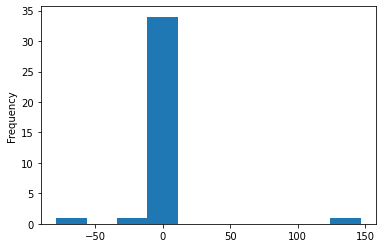

In [9]:
estaciones['Lon'].plot(kind = "hist")

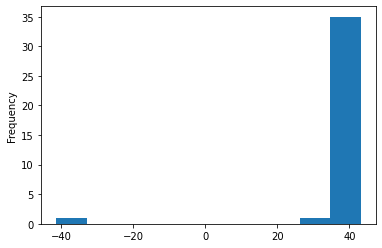

In [10]:
estaciones['Lat'].plot(kind = "hist")

In [11]:
estaciones = estaciones[estaciones['Lat'] > 35.]

In [12]:
#MADRID_COORDS = [40.4167,  -3.70325]
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
m

## Representación de contaminación durante el mes de septiembre

Preprocesa y representa los datos de contaminación en Madrid para el mes de septiembre. Tienes los datos cargados en la variable `contamina`.

In [13]:
# TU CÓDIGO AQUÍ
contamina
contamina['datestr'] = contamina['ANO'].astype(str) +"-"+ contamina['MES'].astype(str) +"-"+ contamina['DIA'].astype(str)
contamina['date'] = contamina.apply(lambda x: pd.to_datetime(x['datestr']), axis=1)
#contamina.head()



## Optimización de rutas

En el worksheet hemos hablado de optimización de rutas como un problema recurrente sobretodo para operaciones logísticas. Lamentablemente, no somos capaces de hacerlo por fuerza bruta en problemas grandes y tampoco sin distancias de ruta por carretera reales. Sin embargo, sí que tenemos la distancia haversine.

Imagina que después de una tormenta eléctrica, todos los dispositivos de medición de contaminación en Madrid se han estropeado y que eres el técnico encargado de repararlos. Si la central del técnico está situada en el punto origen propuesto, construye un algoritmo que calcule la ruta óptima, siendo esta la que más sensores permita reparar en menor tiempo posible y obtén la distancia total recorrida.

Estructura del algoritmo propuesta:
* Establecer punto de origen
* Repetir hasta que no queden puntos por visitar:
    * Calcular desde el punto actual la distancia a todos los puntos restantes.
    * Escoger el punto más cercano.
    * Marcar ese punto como punto ya visitado. No queremos visitar un mismo punto varias veces.
    * Establecer como nuevo punto de origen el seleccionado como más cercano.
* Una vez no queden más puntos por visitar, calcula la distancia de vuelta directamente a la central del técnico.

¿Serías capaz de pintar esta ruta en un mapa de folium?

In [14]:
ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radio de la tierra en km.
    
    return c * r

In [15]:
# TU ALGORITMO DE RUTA AQUÍ

Compara ahora tu resultado con el resultado de OR-Tools. Recuerda que necesitas llamar a la función ```optimize``` de la clase ```HaversineRouteOptimizer``` que requiere los siguientes parámetros:
* Lista de localizaciones en coordenadas GPS.
* Lista de nombres de las localizaciones en el mismo orden.
* Localización de salida de los vehículos. Es el índice de uno de los puntos de localización. Siendo 0 el primer elemento, 1 el segundo, etc...
* Número de vehículos, en este caso sólo uno.

In [16]:
from optimizer import HaversineRouteOptimizer

ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

# TU CÓDIGO AQUÍ
locations = None
origin = None
names = None

hro = HaversineRouteOptimizer()
hro.optimize(locations, names, origin, n_vehicles = 1)

Computing distance matrix...


TypeError: object of type 'NoneType' has no len()

¿Serías capaz de mostrarla en folium para comparar?

In [ ]:
# TU CÓDIGO AQUÍ